# Content
1. Import Libraries
2. Import Data
3. Vizualizations
    - bar
    - historgam
    - ad-hoc cleaning of data
    - line

# 01 Importing Libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import data

In [2]:
path = r'C:\Users\tlayt\OneDrive\Documents\CF Data Analytics\Acheivement 4\Instacart Basket Analysis'

In [3]:
#import data
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_agged.pkl'))


# 03 4.9 Lesson

## Bar charts

<Axes: >

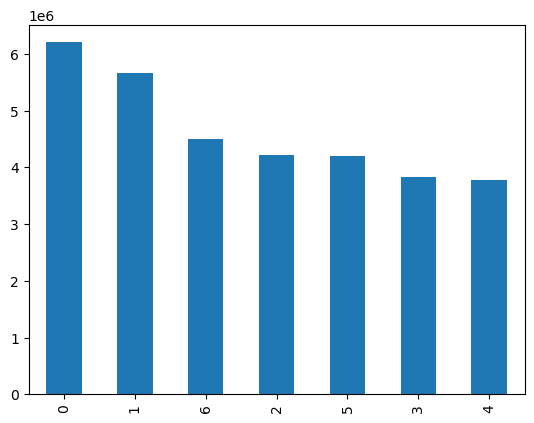

In [4]:
#bar chart 
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: >

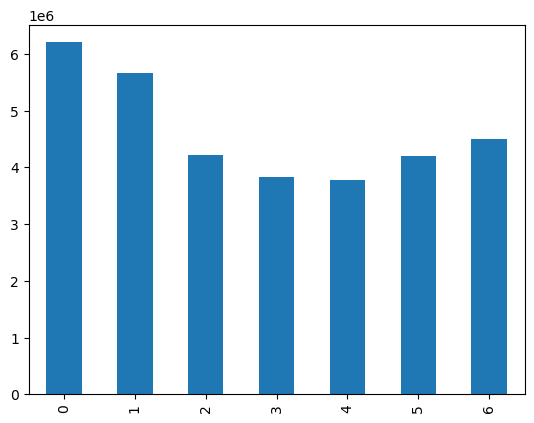

In [5]:
#bar chart with sort 
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: >

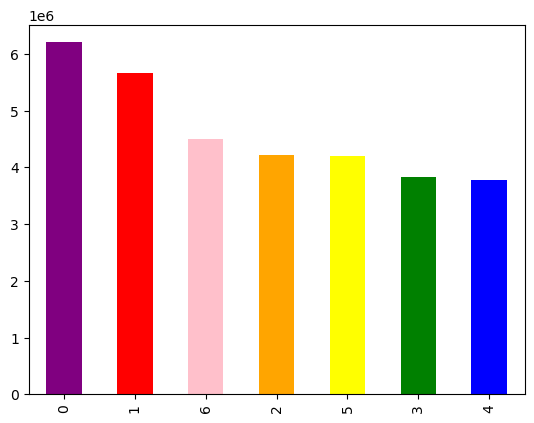

In [6]:
#changing color
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

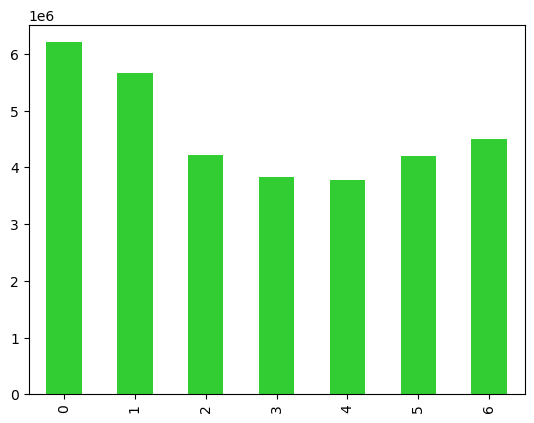

In [10]:
#saving to jupyter
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['limegreen'])

In [11]:
#exporting image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Histograms

<Axes: ylabel='Frequency'>

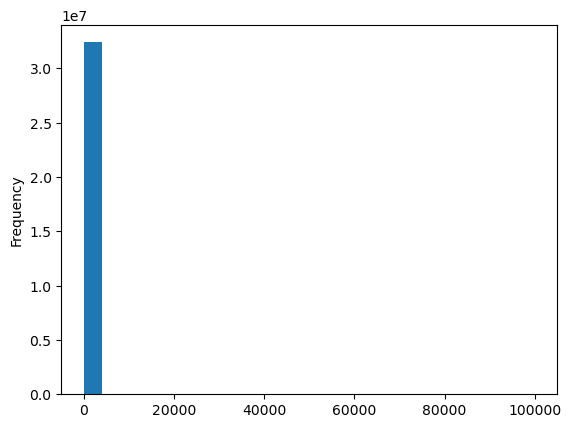

In [12]:
#creating histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

## ---- adhock cleaning

In [13]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [15]:
#checking stats 
ords_prods_merge['prices'].mean()

11.980225638383454

In [16]:
ords_prods_merge['prices'].median()

7.4

In [17]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

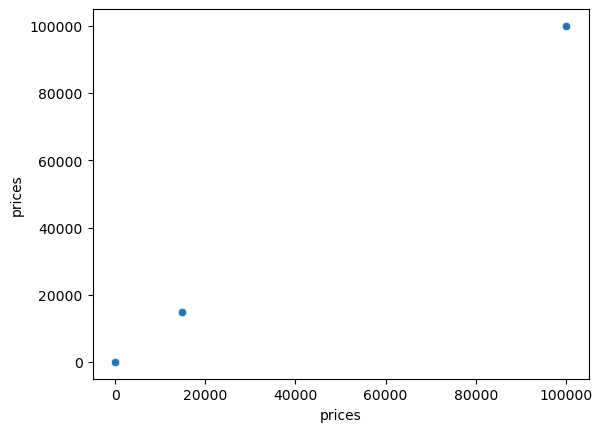

In [18]:
#creating scatterplot to check for outliers
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [20]:
#checking price data over $100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_labels,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,med_DSPO,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most Orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most Orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average Orders,4,New customer,1154.792308,High spender,12.0,NaN
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiests days,Average Orders,4,New customer,1154.792308,High spender,12.0,NaN
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiests days,Average Orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiests days,Average Orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiests days,Average Orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busiest days,Most Orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busiest days,Average Orders,12,Regular customer,1178.381871,High spender,12.0,NaN


In [21]:
# changing potential outliers to NaN
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [22]:
#checking 
ords_prods_merge['prices'].max()

25.0

## ----- back to viz 

<Axes: ylabel='Frequency'>

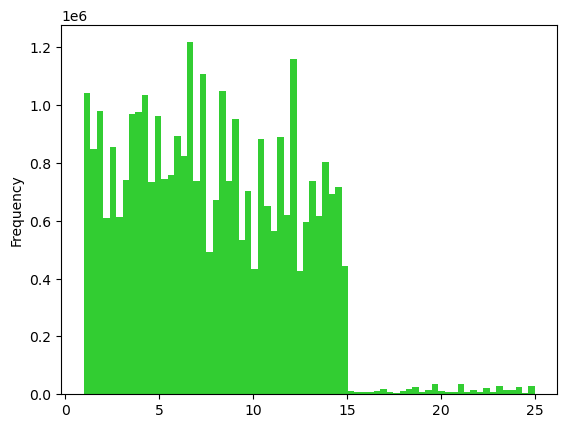

In [26]:
#creating histogram
ords_prods_merge['prices'].plot.hist(bins = 70, color = ['limegreen'])

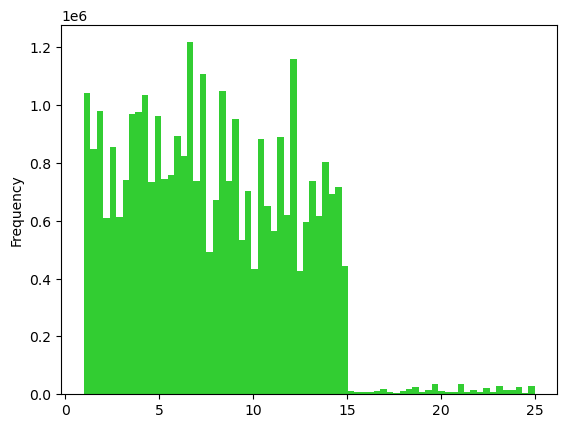

In [27]:
price_hist = ords_prods_merge['prices'].plot.hist(bins = 70, color = ['limegreen'])

In [28]:
#exporting image
price_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_hist.png'))

## Line Charts

In [29]:
#creating a random sample
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [30]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [31]:
#splitting into two groups 
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [33]:
#checking 
len(ords_prods_merge)

32404859

In [34]:
len(big) + len(small)

32404859

In [35]:
#subset df to reduce to only desired columns to lessen run time 
df_2 = small[['orders_day_of_week','prices']]

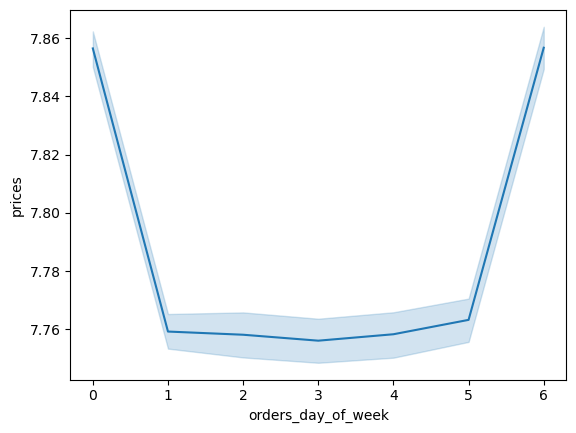

In [37]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [38]:
#exporting image
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_DOW_line.png'))